In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def random_number( count = 12 ):
    result = 0;
    for run in range (0 , count):
        result += random.random()
    result -= 6
    return result 

In [3]:
def calculate_new_data( previous_value , time_step , risk_free_rate , volatile ):
    return previous_value * ( 1 + time_step*risk_free_rate + volatile*random_number()*math.sqrt( time_step ) )

In [4]:
time_step = 0.001
start_stock = 100
exercise_price = 100
volatile = 0.2 # unit percent
risk_free_rate = 0.05 # unit percent
exercise_time = 1

In [5]:
all_data = []
many_data = 10000
many_time = 1000
for run_size_data in range( 0 , many_data ):
    all_data.append( [start_stock] )
    for run_size_time  in range(0 , many_time):
        all_data[run_size_data].append( calculate_new_data( all_data[ run_size_data ][run_size_time] , time_step , risk_free_rate , volatile ) )

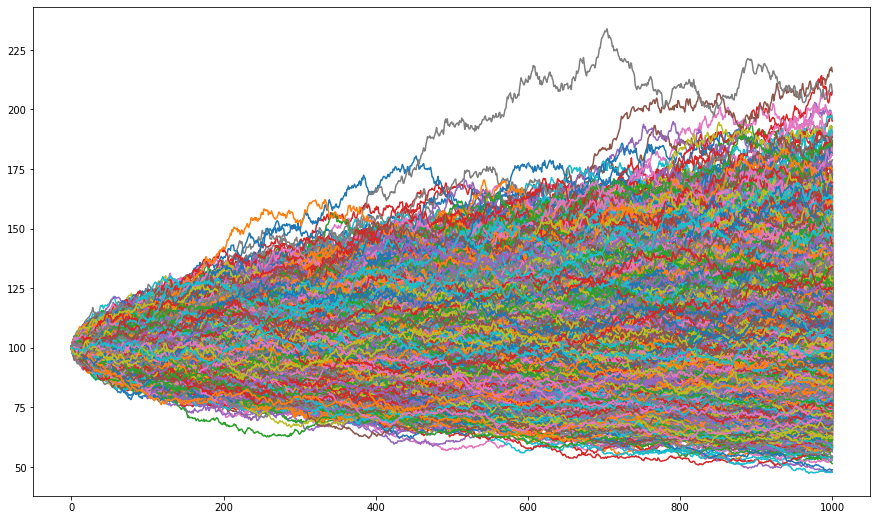

In [6]:
fig = plt.figure( figsize=( 15 , 9) )
for run in range( 0 , many_data ):
     plt.plot(all_data[run])

In [7]:
data = np.array( all_data )

In [8]:
data_call_payoff = np.zeros( data.shape[0] )
for run in range ( 0 , data_call_payoff.shape[0] ):
    data_call_payoff[ run ] = max( data[ run ][ data.shape[1] - 1 ] - exercise_price, 0 )
data_call_payoff

array([38.8177841 , 20.33841946, 22.36694602, ...,  0.        ,
        0.        ,  0.        ])

In [9]:
discount_rate = math.exp( -risk_free_rate*1 )
predict_call_payoff = np.mean( data_call_payoff ) * discount_rate


In [10]:
print( predict_call_payoff )

10.501028894640354


I will use black scholes equation

In [11]:
import scipy.stats as si

In [12]:
d_1 = ( math.log( start_stock / exercise_price , math.e ) +
       ( risk_free_rate + (1/2)*math.pow( volatile , 2 ) ) *( exercise_time - 0 )
      )/( volatile * math.sqrt( exercise_time - 0 ) )

d_2 = ( math.log( start_stock / exercise_price , math.e ) +
       (risk_free_rate - (1/2)*math.pow( volatile , 2 ) ) * ( exercise_time - 0 )
      )/( volatile * math.sqrt( exercise_time - 0 ) )

call_option_value = start_stock*si.norm.cdf(d_1) - exercise_price*math.exp( -risk_free_rate * ( exercise_time - 0 ))*si.norm.cdf( d_2 )
print( "d_1 is {:6.3f} and d_2 is {:6.3f} so result = {:6.3f}".format( d_1 , d_2 , call_option_value ))

d_1 is  0.350 and d_2 is  0.150 so result = 10.451
